In [83]:
import numpy as np
import pylab
import seaborn as sns
import pandas as pd
import pywt
from scipy.integrate import quad
%matplotlib inline
%config InlineBackend.figure_format = 'retina';

Wavelets are one type of adaptive, nonparametric estimation method.
Here we explore the basic ideas.

We first define the Father and Mother Haar wavelets:
$$\phi(x) = 
\begin{cases}
1 \mathrm{~if~} x \in [0,1] \\
0 \mathrm{~otherwise~} \\
\end{cases}
$$
and
$$\psi(x) = 
\begin{cases}
-1 \mathrm{~if~} x \in [0,1/2] \\
1 \mathrm{~if~} x \in (1/2,1] \\
0 \mathrm{~otherwise~} \\
\end{cases}
$$

In [49]:
phi = lambda x: 1 if (x >= 0 and x <= 1) else 0
psi = lambda x: -1 if (x >= 0 and x <= 0.5) \
    else 1 if (x > 0.5 and x <= 1) else 0
    
# here x is a numpy vector
#phi = lambda x: (x>=0) & (x<=1)
#def psi(x):
#    xnew = np.zeros(len(x))
#    xnew[(x>=0) & (x<=0.5)] = -1
#    xnew[(x>0.5) & (x<=1)] = 1
#    return xnew

Here's what the two functions look like:

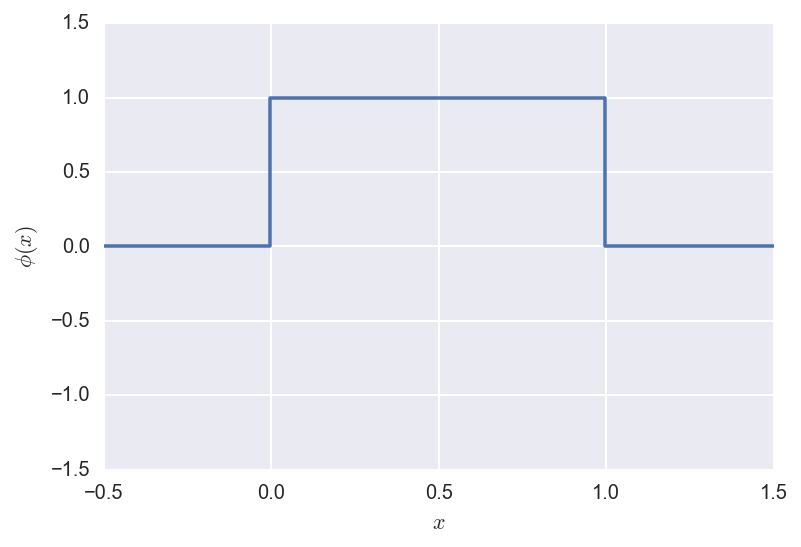

In [25]:
x = np.linspace(-2,2,500)
y = np.array([phi(i) for i in x])

pylab.step(x, y)
pylab.xlim(-.5,1.5); pylab.ylim(-1.5,1.5); 
pylab.ylabel(r"$\phi(x)$"); pylab.xlabel(r"$x$")

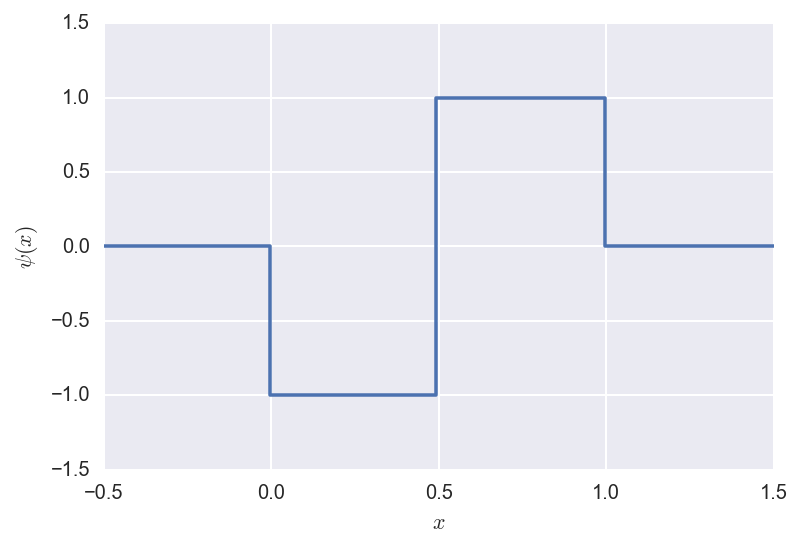

In [26]:
y = np.array([psi(i) for i in x])
pylab.step(x, y)

pylab.xlim(-.5,1.5); pylab.ylim(-1.5,1.5); 
pylab.ylabel(r"$\psi(x)$"); pylab.xlabel(r"$x$")

Now we define the wavelets as shifted and rescaled versions of the
Father and Mother wavelets:
$$\phi_{jk}(x) = 2^{j/2} \phi(2^j x - k)$$
and
$$\psi_{jk}(x) = 2^{j/2} \psi(2^j x - k).$$

Below we plot some examples: $\phi_{2,2}, \psi_{2,2}$.

In [21]:
phi_jk = lambda x, j, k: 2**(j/2.) * phi(2**j * x - k)
psi_jk = lambda x, j, k: 2**(j/2.) * psi(2**j * x - k)

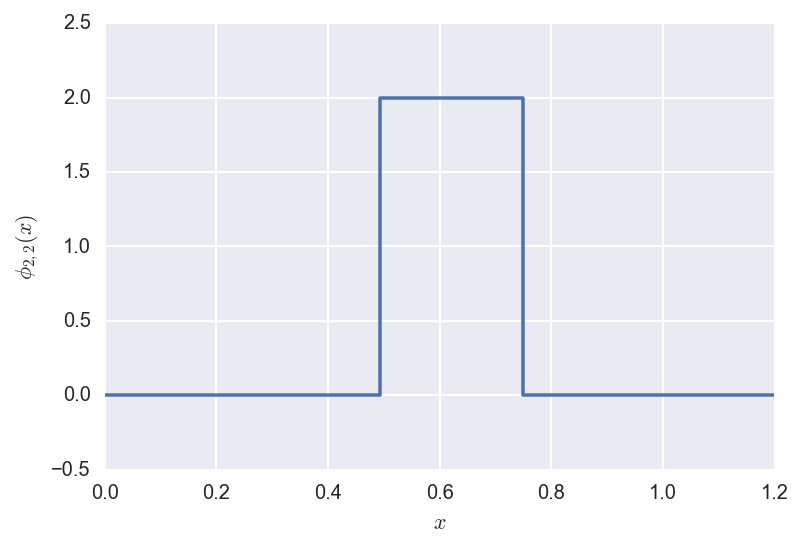

In [27]:
y = np.array([phi_jk(i,2,2) for i in x])

pylab.step(x, y)
pylab.xlim(0.,1.2); pylab.ylim(-.5,2.5); pylab.ylabel(r"$\phi_{2,2}(x)$");
pylab.xlabel(r"$x$")

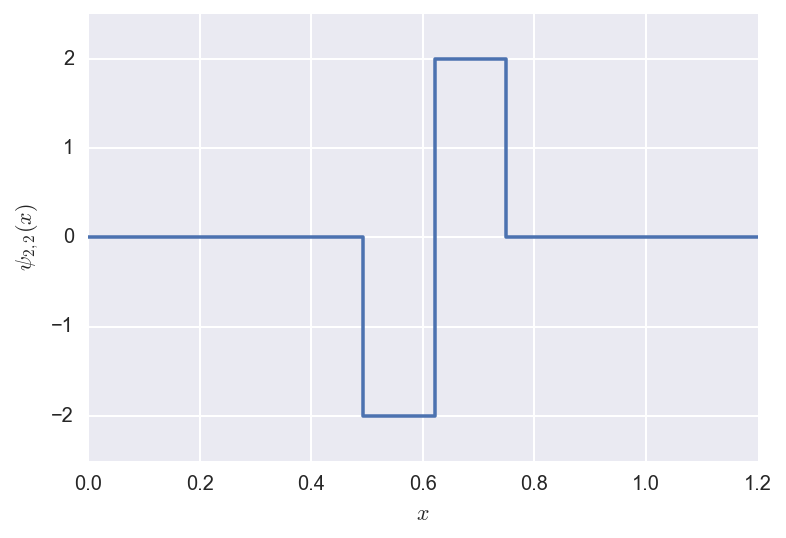

In [28]:
y = np.array([psi_jk(i,2,2) for i in x])

pylab.step(x, y)
pylab.xlim(0.,1.2); pylab.ylim(-2.5,2.5); pylab.ylabel(r"$\psi_{2,2}(x)$");
pylab.xlabel(r"$x$")

The set of rescaled and shifted mother wavelets at resolution $j$
is defined as:
$$W_j = \{\psi_{jk}, k=0,1,\ldots,2^{j-1}\}.$$

We plot an example where $j=3$:

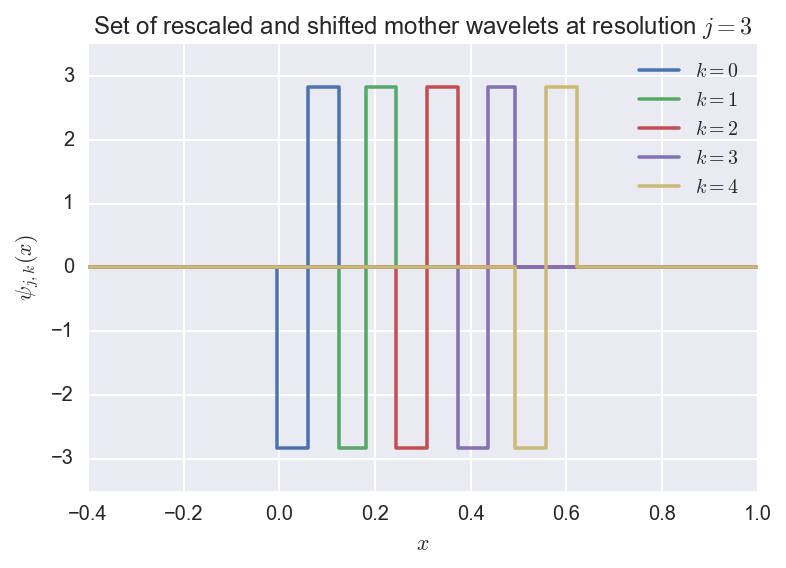

In [30]:
for k in np.arange(0,5):
    y = np.array([psi_jk(i,3,k) for i in x])
    pylab.step(x, y)

pylab.xlim(-0.4,1.); pylab.ylim(-3.5,3.5); pylab.ylabel(r"$\psi_{j,k}(x)$");
pylab.xlabel(r"$x$")
pylab.title(r"Set of rescaled and shifted mother wavelets at resolution $j=3$")
pylab.legend([r"$k=0$",r"$k=1$",r"$k=2$",r"$k=3$",r"$k=4$"])

**Theorem**: The set of functions $$\{\phi, W_0, W_2, W_2,\ldots\}$$
is an orthonormal basis for $L_2(0,1)$, i.e., the set of real-valued functions on $[0,1]$ where $\int_0^1 f^2(x) dx < \infty$.

As a result, we can expand any function $f \in L_2(0,1)$ in this basis:
$$
f(x) = \alpha \phi(x) + \sum_{j=0}^{\infty} \sum_{k=0}^{2^j-1} 
\beta_{jk} \phi_{jk}(x),
$$
where $\alpha = \int_0^1 \phi(x) dx$ is the scaling coefficient, and
$\beta_{jk} = \int_0^1 f(x) \psi_{jk}(x) dx$ are the detail coefficients.

So to approximate a function $f \in L_2(0,1)$, we can take the finite
sum
$$
f_J(x) = \alpha \phi(x) + \sum_{j=0}^{J-1} \sum_{k=0}^{2^j-1} 
\beta_{jk} \phi_{jk}(x).
$$
This is called the resolution $J$ approximation, and has $2^J$ terms.

We consider an example below. Suppose we are interested in approximating
the Doppler function:

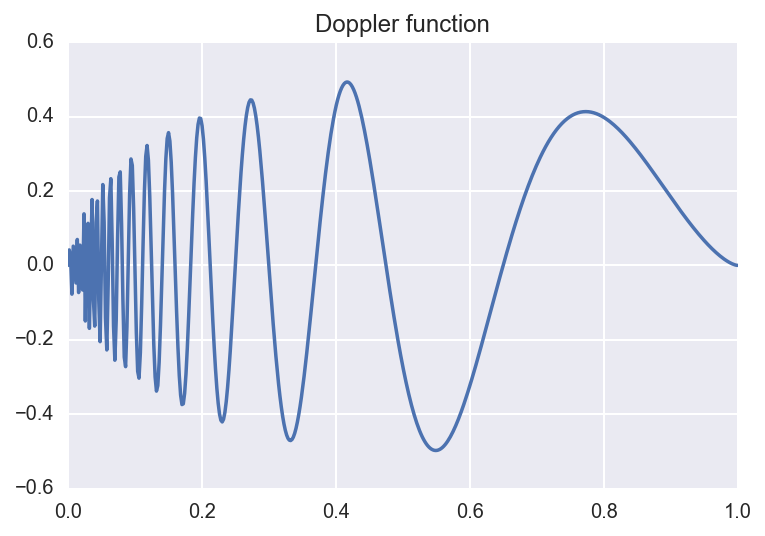

In [31]:
doppler = lambda x: np.sqrt(x*(1-x)) * np.sin(2.1*np.pi/(x+.05))
x = np.linspace(0,1,500)
pylab.plot(x, doppler(x))
pylab.title("Doppler function")

In [60]:
def compute_sum(J, x):
    a_int = lambda x: doppler(x) * phi(x) 
    beta_int_jk = lambda x, j, k: doppler(x) * psi_jk(x,j,k) 
    alpha = quad(a_int, 0, 1)[0]
    total = alpha * phi(x)
    for j in range(0,J):
        for k in range(0, 2**j):
            beta_jk = quad(beta_int_jk, 0, 1, args=(j,k))[0]
            total += beta_jk * psi_jk(x, j, k)
    return total
    
finite_3 = lambda x: compute_sum(3, x)
finite_5 = lambda x: compute_sum(5, x)
finite_8 = lambda x: compute_sum(8, x)
finite_10 = lambda x: compute_sum(10, x)
finite_20 = lambda x: compute_sum(20, x)

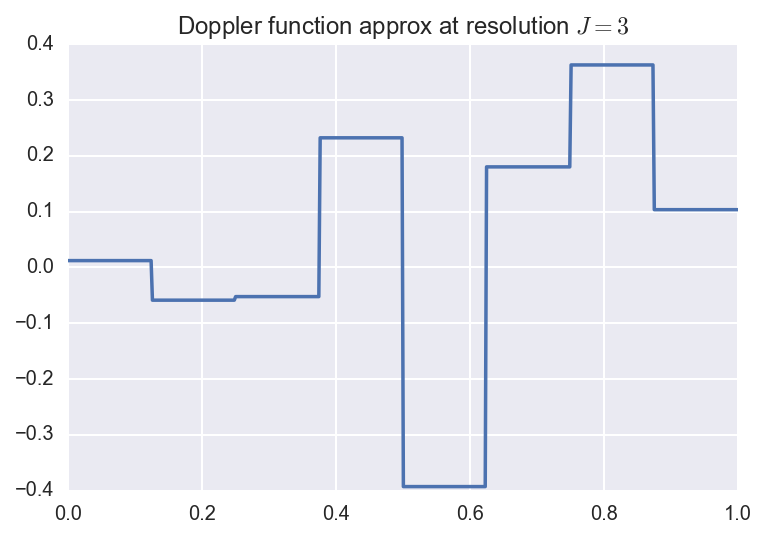

In [54]:
x = np.linspace(0,1,500)
y = [finite_3(i) for i in x]
pylab.plot(x, y)
pylab.title(r"Doppler function approx at resolution $J=3$")

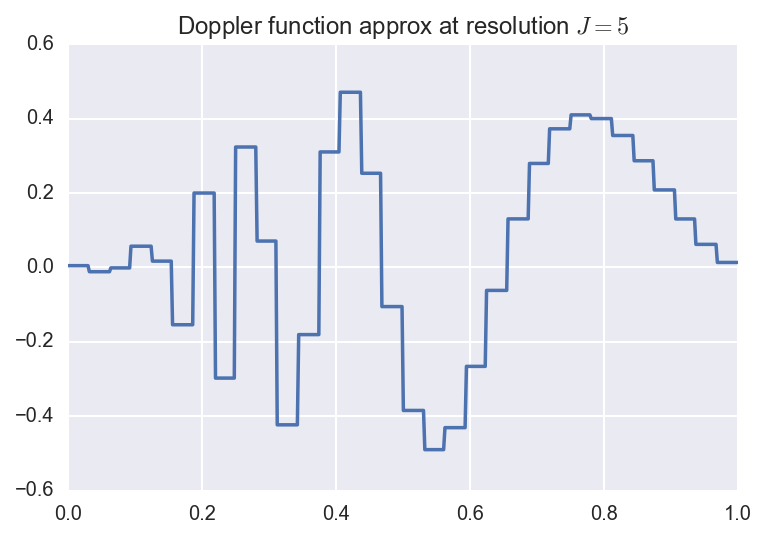

In [55]:
x = np.linspace(0,1,500)
y = [finite_5(i) for i in x]
pylab.plot(x, y)
pylab.title(r"Doppler function approx at resolution $J=5$")

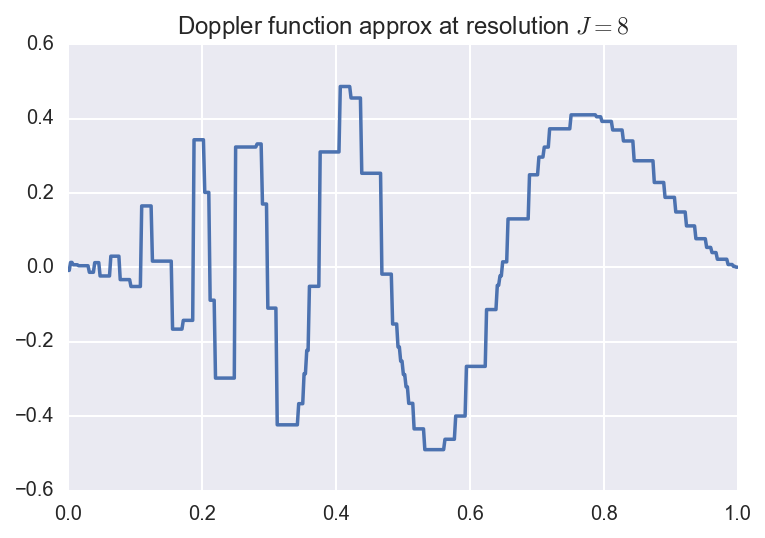

In [56]:
x = np.linspace(0,1,500)
y = [finite_8(i) for i in x]
pylab.plot(x, y)
pylab.title(r"Doppler function approx at resolution $J=8$")

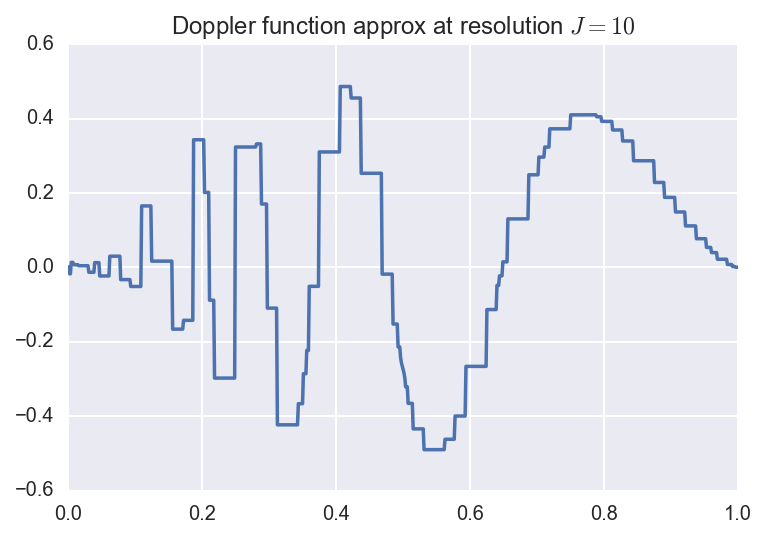

In [61]:
x = np.linspace(0,1,800)
y = [finite_10(i) for i in x]
pylab.plot(x, y)
pylab.title(r"Doppler function approx at resolution $J=10$")

Below we plot the coefficients $\beta_{j,k}$. Here the $y$-axis is 
$j$ and the $x$-axis plots where the support of the specific wavelet is.

In [62]:
def get_coefs(J, xvals):
    father_coefs = []
    for x in xvals:
        father_coefs.append(phi(x))
        mother_coefs = [[] for i in range(J)]
        for j in range(0,J):
            for k in range(0, 2**j):
                beta_jk = quad(beta_int_jk, 0, 1, args=(j,k))[0]
                mother_coefs[j].append(beta_jk)
    return father_coefs, mother_coefs
father_coefs, mother_coefs = get_coefs(3, x)


In [178]:
def plot_coefs(mother_coefs, scale):
    for level, coefs in enumerate(mother_coefs):
        low = np.zeros(len(coefs)); up = np.zeros(len(coefs))
        for i, c in enumerate(coefs):
            norm_c = c / scale
            if c <= 0:
                up[i] = 0; low[i] = -norm_c
            else:
                up[i] = norm_c; low[i] = 0
        ncoefs = len(coefs)
        x = np.linspace(0,1,ncoefs+2)[1:-1]
        #pylab.scatter(x, level*np.ones(ncoefs))
        pylab.errorbar(x, level*np.ones(ncoefs), yerr=[low,up], fmt='o')
    pylab.xlim([0,1.])
    pylab.ylim([-.1,len(mother_coefs)+.1])
    pylab.xlabel("x"); pylab.ylabel("resolution"); 
    pylab.title("Mother coefficients")
    #pylab.legend(['$j=0$', '$j=1$', '$j=2$'])

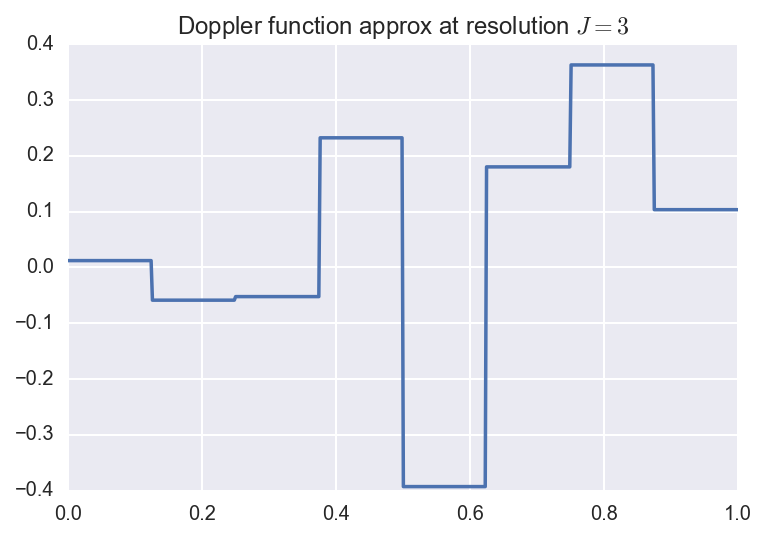

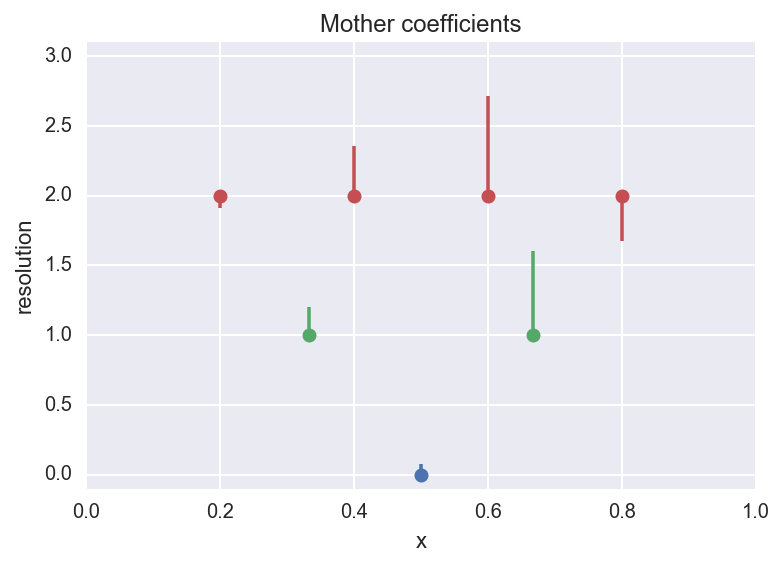

In [181]:
x = np.linspace(0,1,500)
y = [finite_3(i) for i in x]
pylab.plot(x, y)
pylab.title(r"Doppler function approx at resolution $J=3$")
pylab.figure()
plot_coefs(mother_coefs, scale=0.2)

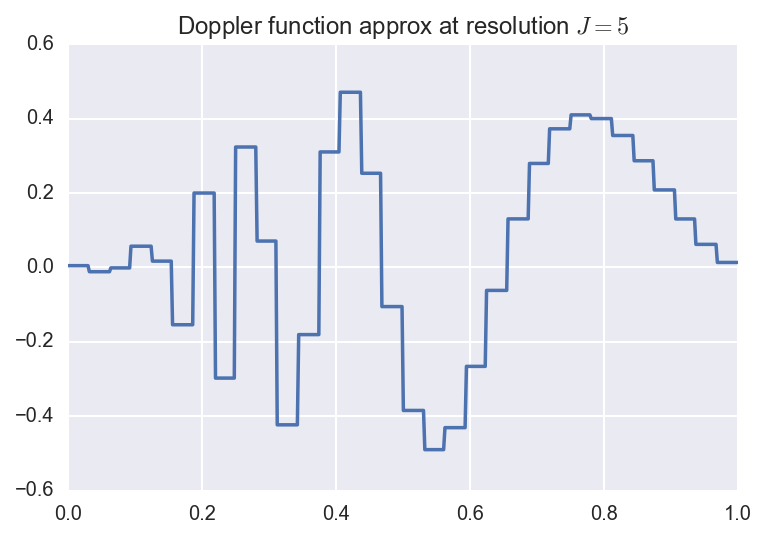

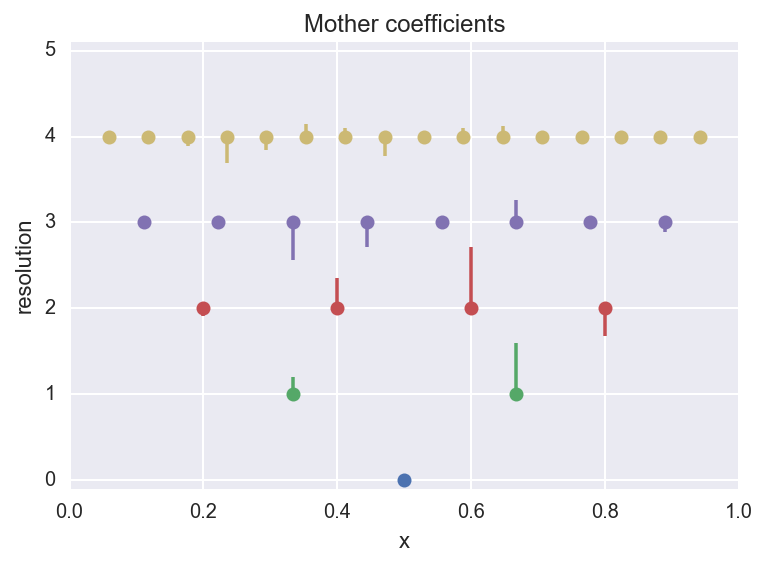

In [183]:
y = [finite_5(i) for i in x]
pylab.plot(x, y)
pylab.title(r"Doppler function approx at resolution $J=5$")
pylab.figure()
father_coefs, mother_coefs = get_coefs(5, x)
plot_coefs(mother_coefs, scale=0.2)

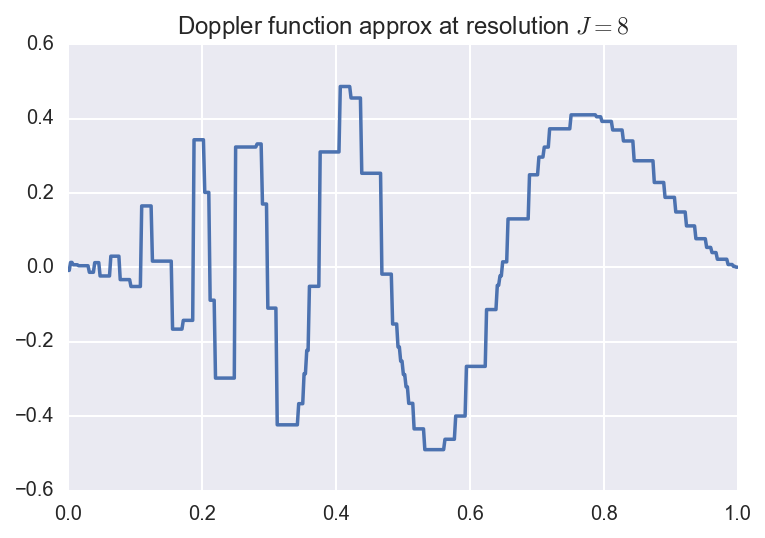

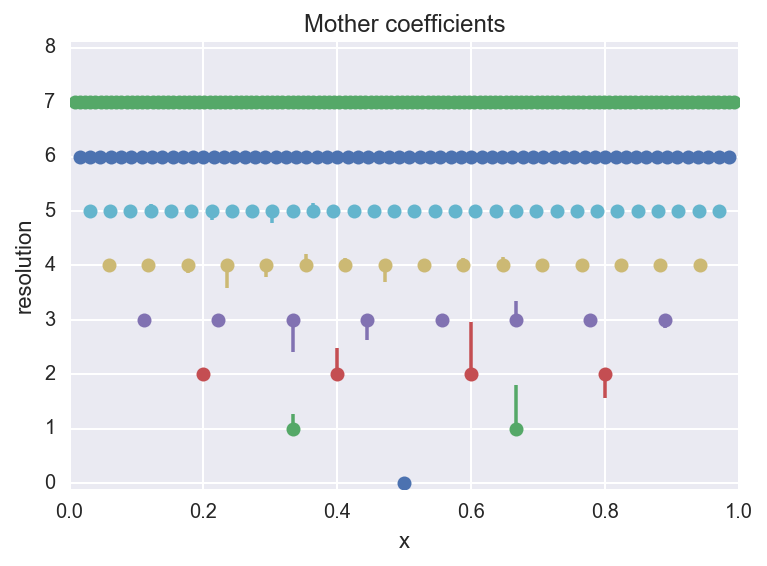

In [184]:
y = [finite_8(i) for i in x]
pylab.plot(x, y)
pylab.title(r"Doppler function approx at resolution $J=8$")
pylab.figure()
father_coefs, mother_coefs = get_coefs(8, x)
plot_coefs(mother_coefs, scale=0.15)